# Class importance using Fuzzy Cognitive Maps

Fuzzy Cognitive maps can be used for classification tasks. One of the big benefits of them is, that they can be explained more easily than neural networks for example.
Based on the python package `fmcpy` and their example presented in their [paper](https://arxiv.org/pdf/2111.12749) we will go through one case, to get a better idea of how it works. We will take a look at the class importance.

### Long-Term Cognitive Networks (LTCN-MP)

In the image below there is a visualization from the above mentioned paper. The graph consists of:
* input signal: x1, x2, x3
* inner layer: c1, c2, c3
* outer layer: c4, c5, c6
* output layer: y1, y2, y3

The weights between the nodes of the inner layer are computet with the least square problem (unsupervised) and the weights between the inner and outer layer with the Moore-Penrose-Inverse.

![LTCN_MP Visualization](image/LTCN_MP_Paper.png)

Here we load the necessary packages and functions.

In [11]:
import fcmpy.ml.classification.FCM_MP as mp
import matplotlib.pylab as plt

## Input format

When working with the `fcmpy` package, it is necessary to use the **.arff** format and that the values are normalized.

In [51]:
sources = ["data/diabetes_normalized.arff"]

In [52]:
params = {"sources":sources}

## Pima Indians Diabetes Dataset

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains medical diagnostic information for female patients of Pima Indian heritage, aged 21 or older, and is commonly used for binary classification tasks to predict the onset of diabetes.

### Features:

* **Number of times pregnant**  
  Number of times the patient has been pregnant. Indicates general health and hormonal factors that could correlate with diabetes risk.

* **Plasma glucose concentration (2 hours in an oral glucose tolerance test)**  
  The glucose concentration in the blood two hours after a glucose intake. A key indicator of how the body processes sugar and a primary diagnostic factor for diabetes.

* **Diastolic blood pressure (mm Hg)**  
  Measures the pressure in the arteries when the heart rests between beats. High blood pressure is a risk factor for diabetes complications.

* **Triceps skin fold thickness (mm)**  
  A measure of body fat using skinfold thickness. Often used to estimate overall body fat percentage.

* **2-Hour serum insulin (mu U/ml)**  
  The insulin level in the blood two hours after a glucose load. Provides insight into how the body manages insulin, which is vital for diabetes diagnosis.

* **Body mass index (BMI)**  
  Calculated as weight in kilograms divided by height in meters squared. Indicates body fat level and obesity, which are significant risk factors for diabetes.

* **Diabetes pedigree function**  
  A function that scores the likelihood of diabetes based on family history. Higher values indicate a stronger genetic predisposition.

* **Age (years)**  
  The age of the patient. Risk of diabetes typically increases with age.

### Target Class:

* **Class:**  
  Indicates whether or not the patient shows signs of diabetes, according to diagnostic criteria.

  * `tested_negative` – The patient does not have diabetes.
  * `tested_positive` – The patient has diabetes.

---

This dataset is often used for binary classification using algorithms such as logistic regression, decision trees, support vector machines, and neural networks. It is especially useful for learning medical data preprocessing, handling missing values, and evaluating classification metrics such as accuracy, sensitivity, and specificity.


The packages allows us to change different parameter setting, which will effect the performance of the model.

- **L (int, default=0)**: Used in reasoning rule 3 to determine temporal dependencies.
- **M (int, default=1)**: Number of output variables in the dataset.
- **T (int, default=None)**: Number of iterations in the FCM model; if not set, defaults to `features - output variables`.
- **b1 (float, default=1.0)**: Weighting parameter used in reasoning rules to control activation function blending.
- **folds (int, default=10)**: Number of folds used in Stratified K-Fold cross-validation.
- **output (str, default='./output.csv')**: File path for saving results in CSV format.
- **rule (int, choices=[0, 1, 2], default=0)**: Selection of reasoning rule:
  - `0`: Standard logit function.
  - `1`: Weighted combination of logit and previous output.
  - `2`: Weighted combination including self-feedback.
- **verbose (bool, default=False)**: If `True`, enables detailed output logging during training.

**Activation Function Parameters** (`p` List)

- **p[0] (float, default=1.0)**: Slope parameter for the activation function.
- **p[1] (float, default=1.0)**: Offset (`h`) used for activation scaling.
- **p[2] (float, default=1.0)**: `q` parameter, controlling curve steepness.
- **p[3] (float, default=1.0)**: `v` parameter, adjusting function shape.



The output of the LTCN-MP is numeric and the implementation uses the Mean Squared Error (MSE) to update the weights.

In [53]:
out = mp.run(**params)

Processing data/diabetes_normalized.arff
{'b1': '1.00', 'L': 0, 'slope': '1.00', 'h': '1.00', 'train_error': 0.03841837307179344, 'test_error': 0.038403366371031415, 'training_time': 0.0032445, 'weights': array([[ 1.        ,  0.11128312,  0.10253711, -0.05140158, -0.04886039,
         0.00557817, -0.02558134],
       [ 0.16587783,  1.        ,  0.15956677,  0.06723121,  0.28375611,
         0.1569192 ,  0.12974607],
       [ 0.16323718,  0.17042034,  1.        ,  0.22419937,  0.08234766,
         0.22832296,  0.02635283],
       [-0.07759638,  0.06808899,  0.21259908,  1.        ,  0.3705589 ,
         0.2993073 ,  0.17122723],
       [-0.10163266,  0.39597022,  0.10759439,  0.51058565,  1.        ,
         0.18022342,  0.19636169],
       [ 0.01555394,  0.29353902,  0.39990828,  0.55284212,  0.24159264,
         1.        ,  0.18691411],
       [-0.04885589,  0.16623741,  0.03161425,  0.21662145,  0.18029099,
         0.12802268,  1.        ]]), 'importance': array([[-0.02136062],
 

In [54]:
out[0]["weights"]

array([[ 1.        ,  0.11128312,  0.10253711, -0.05140158, -0.04886039,
         0.00557817, -0.02558134],
       [ 0.16587783,  1.        ,  0.15956677,  0.06723121,  0.28375611,
         0.1569192 ,  0.12974607],
       [ 0.16323718,  0.17042034,  1.        ,  0.22419937,  0.08234766,
         0.22832296,  0.02635283],
       [-0.07759638,  0.06808899,  0.21259908,  1.        ,  0.3705589 ,
         0.2993073 ,  0.17122723],
       [-0.10163266,  0.39597022,  0.10759439,  0.51058565,  1.        ,
         0.18022342,  0.19636169],
       [ 0.01555394,  0.29353902,  0.39990828,  0.55284212,  0.24159264,
         1.        ,  0.18691411],
       [-0.04885589,  0.16623741,  0.03161425,  0.21662145,  0.18029099,
         0.12802268,  1.        ]])

The weight matrix (W) represents the relationships (causal influence) between concepts in the Fuzzy Cognitive Map (FCM).

<BarContainer object of 7 artists>

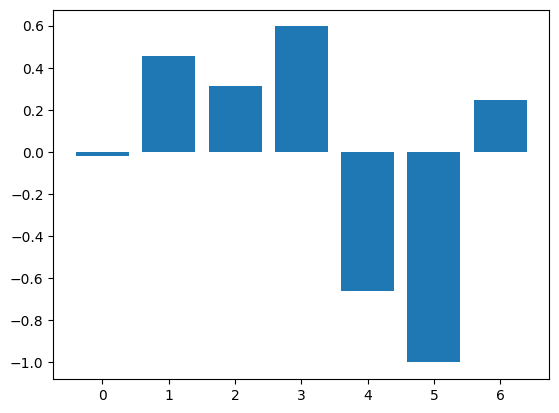

In [57]:
# feature importance for classification purposes
fig, ax = plt.subplots()
ax.bar(range(len(out[0]["importance"].flatten())),
height=out[0]["importance"].flatten())

In [58]:
out[0]["importance"]

array([[-0.02136062],
       [ 0.45757891],
       [ 0.31150838],
       [ 0.59619077],
       [-0.65955128],
       [-1.        ],
       [ 0.24915208]])

## Feature Importance in Predicting Diabetes (Medically Corrected)

These weights represent the influence of each normalized feature on the model’s prediction. Positive values **increase the chance of diabetes**, while negative values **decrease it**.

| Feature                    | Weight    | Model's Influence       | Medical Correlation             | Notes                                       |
|----------------------------|-----------|--------------------------|----------------------------------|---------------------------------------------|
| **Pregnancies**            | -0.021    | Weak negative            | Usually positive                 | Minimal effect in model. Could be due to data scale or feature interactions. |
| **Glucose**                | +0.458    | Strong positive          | Strong positive                  | Correct — high glucose is a primary indicator of diabetes. |
| **Blood Pressure**         | +0.312    | Moderate positive        | Mild positive                    | Reasonable — high BP can relate to insulin resistance. |
| **Skin Thickness**         | +0.596    | Strong positive          | Positive                         | Skinfold thickness correlates with body fat, a valid risk factor. |
| **Insulin**                | -0.660    | Strong negative          | Should be positive or non-linear | Model might misinterpret missing values (often 0s). |
| **BMI**                    | -1.000    | Strongest negative       | Strong positive                  | Incorrect — high BMI is a major risk factor. May indicate model issues or feature collinearity. |
| **Diabetes Pedigree Func.**| +0.249    | Mild positive            | Positive                         | Reasonable — family history affects diabetes risk. |

---

### Observations:
- **Glucose** and **Skin Thickness** are strong indicators, aligning with medical expectations.
- **BMI** has a highly negative weight, which **contradicts medical understanding** — this likely suggests:
  - Misinterpretation by the model
  - Issues with normalization or missing data handling
  - Multicollinearity with other features
- The **Insulin** feature is also negatively weighted, which could indicate problems with zero/imputed values or model bias.

